In [5]:
from sklearn import datasets

In [6]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
#DESCR gives us information about the dataset

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [8]:
#feature_names was already configured to return only the independent variables (X)

print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [9]:
#Separete the columns of the independent variables (X) and the dependent variable (Y)

X = diabetes.data
Y = diabetes.target

In [10]:
X.shape, Y.shape

((442, 10), (442,))

In [11]:
#Perform 80/20 data split to test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [12]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [13]:
X_test.shape, Y_test.shape

((89, 10), (89,))

In [14]:
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error, r2_score

model = linear_model.LinearRegression()

In [15]:
#Training of the model

model.fit(X_train, Y_train)

LinearRegression()

In [16]:
#Applied trained model to make the prediction (on test set)

Y_pred = model.predict(X_test)

In [17]:
#Checking the model performance

print('Coeficients: ', model.coef_)
print('Intercept: ', model.intercept_)
print('Mean Squared Error (MSE): %.2f'
      % root_mean_squared_error(Y_test, Y_pred))
print('Coefient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coeficients:  [ -25.8529688  -239.88441155  510.15603061  316.78922991 -777.28693741
  496.71409594   57.80880811  109.78735582  722.4420074    79.70691748]
Intercept:  153.427065674002
Mean Squared Error (MSE): 50.38
Coefient of determination (R^2): 0.58


Text(0.5, 1.0, 'Scatter Chart with regression line')

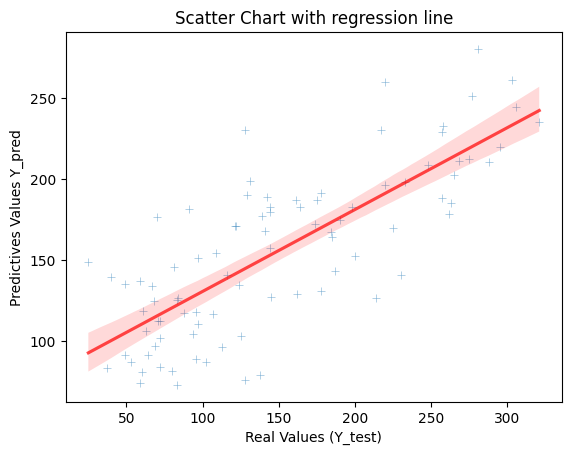

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

#Scatter Chart
sns.scatterplot(x = Y_test, y= Y_pred, marker = '+', alpha = 0.5)

#Regression Line
sns.regplot(x = Y_test, y = Y_pred, scatter = False, color = 'red', line_kws={'alpha': 0.7})

#Chart
plt.xlabel('Real Values (Y_test)')
plt.ylabel('Predictives Values Y_pred')
plt.title('Scatter Chart with regression line')

array([258., 268.,  61.,  96., 113., 138.,  59., 141.,  37., 198., 295.,
       230.,  63.,  97.,  97., 214., 109.,  72., 178., 144.,  25., 129.,
        84., 200., 277., 102., 131.,  40., 125.,  88.,  83.,  80., 175.,
       275., 225., 263., 144., 142., 121., 281., 128., 122.,  72.,  70.,
       178.,  72.,  91.,  67.,  68., 321., 116.,  60., 233.,  71., 306.,
       185., 187., 164., 303., 248., 128., 144.,  81., 288., 217., 124.,
       262.,  49., 220.,  83., 174., 107., 265., 145., 190.,  59.,  96.,
       220.,  64., 139., 162., 161., 257., 184.,  69., 257.,  94.,  53.,
        49.])

In [26]:
import pandas as pd

df_diabetes = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df_diabetes['target'] = diabetes.target

df_diabetes.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


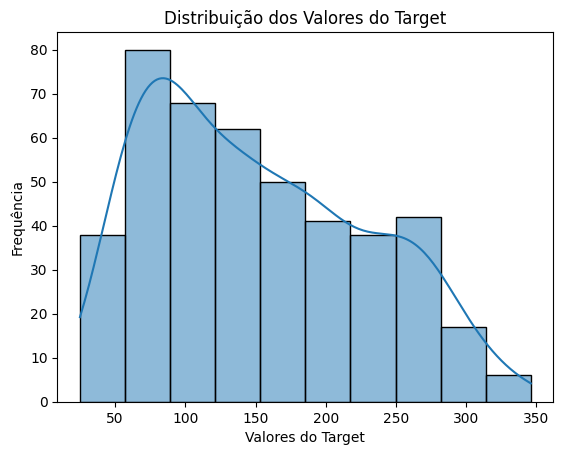

In [28]:
# Visualizando a distribuição do target
df_target = pd.DataFrame(diabetes.target, columns=['target'])
sns.histplot(df_target['target'], kde=True)
plt.title("Distribuição dos Valores do Target")
plt.xlabel("Valores do Target")
plt.ylabel("Frequência")
plt.show()